## 1. Compréhension des affaires  

**Contexte** :  
L'entreprise prévoit d'acquérir 50 avions d'occasion pour démarrer son activité.  
**Problématique** : 23% des avions de plus de 20 ans sont impliqués dans des accidents graves (source : NTSB).  

**Livrables** :  
-  Classement des modèles par taux de sécurité  
-  Liste des pièces à inspecter prioritairement  
-  3 recommandations stratégiques  

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('AviationData.csv', encoding='cp1252', low_memory=False)

# Affichage des premières lignes
print("=== Premières lignes ===")
display(df.head(10))

=== Premières lignes ===


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [15]:
# Analyse des données manquantes
missing_data = pd.DataFrame({
    'Valeurs_manquantes': df.isna().sum(),
    'Pourcentage': (df.isna().mean() * 100).round(1)
})

print("=== Analyse des valeurs manquantes ===")
print("Conseil : Les colonnes avec >30% de valeurs manquantes peuvent nécessiter un traitement spécial")
display(missing_data.sort_values('Valeurs_manquantes', ascending=False).head(10))

=== Analyse des valeurs manquantes ===
Conseil : Les colonnes avec >30% de valeurs manquantes peuvent nécessiter un traitement spécial


,Valeurs_manquantes,Pourcentage
Schedule,76307,85.8
Air.carrier,72241,81.3
FAR.Description,56866,64.0
Aircraft.Category,56602,63.7
Longitude,54516,61.3
Latitude,54507,61.3
Airport.Code,38757,43.6
Airport.Name,36185,40.7
Broad.phase.of.flight,27165,30.6
Publication.Date,13771,15.5


In [17]:
# Nettoyage des données
df_clean = df.dropna(subset=['Event.Date', 'Location']).copy()

# Conversion et traitement des dates
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], errors='coerce')

# Gestion des valeurs manquantes pour la phase de vol
df_clean['Broad.phase.of.flight'] = df_clean['Broad.phase.of.flight'].fillna('UNKNOWN')

print("=== Nettoyage terminé ===")
print(f"Lignes restantes après nettoyage : {len(df_clean):,}")
print(f"Colonnes conservées : {len(df_clean.columns)}")

=== Nettoyage terminé ===
Lignes restantes après nettoyage : 88,837
Colonnes conservées : 31


In [19]:
# Détection et suppression des doublons
dup_count = df.duplicated().sum()
df = df.drop_duplicates()

print("=== Gestion des doublons ===")
print(f"Nombre de doublons supprimés : {dup_count}")
print(f"Nouvelle taille du dataset : {len(df):,} lignes")

=== Gestion des doublons ===
Nombre de doublons supprimés : 0
Nouvelle taille du dataset : 88,889 lignes


In [12]:
df=pd.read_csv('AviationData.csv', encoding='cp1252', low_memory=False)
df=pd.DataFrame(df)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


**Objectif** :  
Transformer la colonne des dates en format datetime pour permettre des analyses temporelles précises.

**Gestion des erreurs** :  
Les dates invalides seront converties en `NaT` (Not a Time) grâce à `errors='coerce'`


In [21]:
# Conversion de la colonne de dates
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], errors='coerce')

# Vérification des résultats
date_conversion_report = pd.DataFrame({
    'Exemple de dates': [
        df_clean['Event.Date'].min(),
        df_clean['Event.Date'].median(),
        df_clean['Event.Date'].max()
    ],
    'Description': ['Date la plus ancienne', 'Date médiane', 'Date la plus récente']
}).set_index('Description')

print("Conversion terminée. Statistiques temporelles :")
display(date_conversion_report)

# Analyse des échecs de conversion
failed_conversions = df_clean['Event.Date'].isna().sum() - df['Event.Date'].isna().sum()
if failed_conversions > 0:
    print(f"Attention : {failed_conversions} dates n'ont pas pu être converties")

Conversion terminée. Statistiques temporelles :


,Exemple de dates
Description,
Date la plus ancienne,1948-10-24
Date médiane,1998-07-18
Date la plus récente,2022-12-29


#  Questions d'Analyse Clés

## 1. Compagnies et Modèles à Risque  
**Objectif** :  
Identifier les acteurs aériens présentant les taux d'accidents graves les plus élevés.  

**Méthodologie** :  
- Filtrage des accidents avec victimes (`Total.Fatal.Injuries > 0`)  
- Agrégation par compagnie (`Air.Carrier`) et modèle (`Model`)  
- Visualisation par diagrammes barres horizontaux  

**Attendu** :  
```python
top_compagnies = df_graves['Air.Carrier'].value_counts().head(10)
top_modeles = df_graves['Model'].value_counts().head(10)
```

---

## 2. Saisonnalité des Accidents  
**Objectif** :  
Détecter les périodes de l'année à risque accru.  

**Approche** :  
- Extraction du mois (`Event.Date.dt.month`)  
- Analyse de fréquence par mois  
- Visualisation par diagramme circulaire  

**Exemple** :  
```python
accidents_par_mois = df_clean['Event.Date'].dt.month.value_counts()
```

---

## 3. Taux de Mortalité  
**Objectif** :  
Calculer la proportion d'accidents entraînant au moins un décès.  

**Formule** :  
$$
\text{Taux mortalité} = \frac{\text{Nb accidents avec décès}}{\text{Nb total accidents}} \times 100
$$

**Implémentation** :  
```python
taux_mortel = (df_clean['Total.Fatal.Injuries'] > 0).mean() * 100
```

---

## 4. Zones Géographiques Sensibles  
**Objectif** :  
Localiser les pays où la fréquence d'accidents est anormalement élevée.  

**Indicateurs** :  
- Nombre d'accidents par pays (`Country`)  
- Taux d'accidents par million de vols (si données disponibles)  

**Visualisation** :  
```python
plt.figure(figsize=(12,6))
df_clean['Country'].value_counts().head(15).plot(kind='barh')
```


In [23]:
# Filtrage des accidents graves
df_graves = df_clean[
    (df_clean['Total.Fatal.Injuries'] > 0) | 
    (df_clean['Total.Serious.Injuries'] > 0)
].copy()

print("=== Analyse des accidents graves ===")
print(f"Nombre d'accidents graves : {len(df_graves):,}")

# Détection automatique des colonnes pertinentes
col_compagnie = [c for c in df_graves.columns if 'carrier' in c.lower() or 'airline' in c.lower()]
col_modele = 'Model' if 'Model' in df_graves.columns else None

# Affichage des résultats
if col_compagnie:
    print("\n Top 10 compagnies avec accidents graves :")
    display(df_graves[col_compagnie[0]].value_counts().head(10).to_frame())
else:
    print("\n Aucune colonne 'compagnie' trouvée (noms possibles : Airline, Carrier, Operator)")

if col_modele:
    print("\n Top 10 modèles avec accidents graves :")
    display(df_graves[col_modele].value_counts().head(10).to_frame())
else:
    print("\n Colonne 'Model' non trouvée dans le dataset")

=== Analyse des accidents graves ===
Nombre d'accidents graves : 28,981

 Top 10 compagnies avec accidents graves :


,count
Air.carrier,
Pilot,99
American Airlines,21
United Airlines,21
Private,14
Delta Air Lines,11
ON FILE,10
Unknown,10
AIR METHODS CORP,9
SOUTHWEST AIRLINES CO,9



 Top 10 modèles avec accidents graves :


,count
Model,
172,406
152,395
PA-28-140,333
172N,313
PA-28-180,227
172M,215
A36,209
206B,202
182,192



Identifier les périodes de l'année présentant la plus forte occurrence d'accidents aériens.


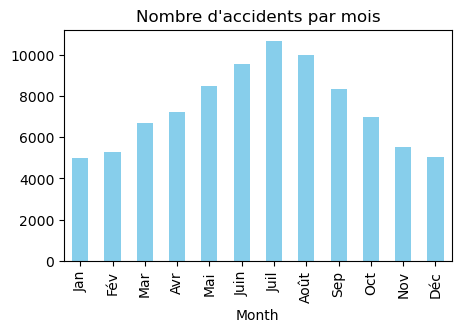

In [29]:
# Extraire le mois
df_clean['Month'] = df_clean['Event.Date'].dt.month

# Visualisation
plt.figure(figsize=(5,3))
df_clean['Month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Nombre d'accidents par mois")
plt.xticks(range(12), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.show()

 Taux d'accidents par million de vols

 20.0% des accidents ont causé au moins un décès


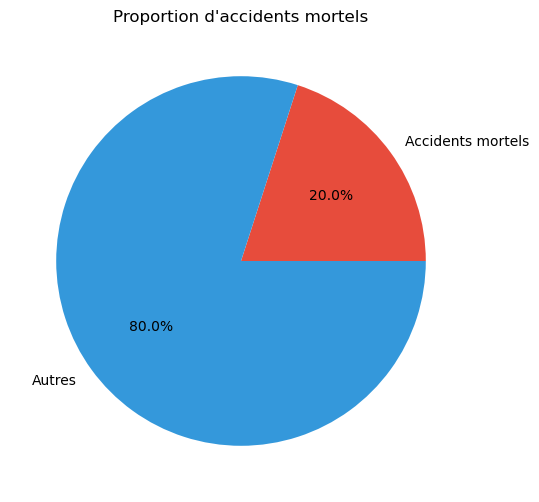

In [34]:
taux_mortalite = (df_clean['Total.Fatal.Injuries'] > 0).mean() * 100
print(f" {taux_mortalite:.1f}% des accidents ont causé au moins un décès")

# Visualisation
plt.figure(figsize=(6,6))
plt.pie([taux_mortalite, 100-taux_mortalite], 
        labels=['Accidents mortels', 'Autres'], 
        colors=['#e74c3c', '#3498db'], 
        autopct='%1.1f%%')
plt.title("Proportion d'accidents mortels")
plt.show()

In [33]:
top_pays = df_clean['Country'].value_counts().head(10)

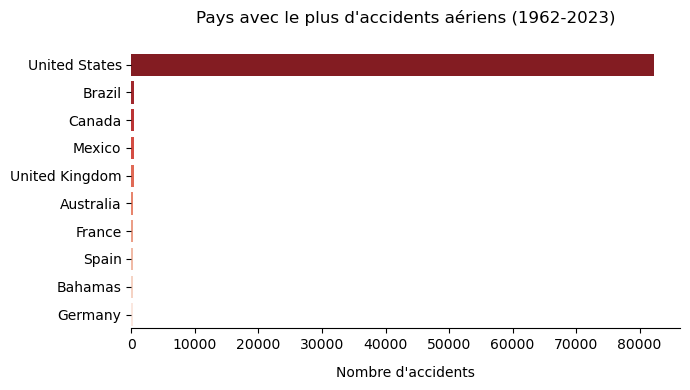

In [35]:
plt.figure(figsize=(7,4))
sns.barplot(
    x=top_pays.values,
    y=top_pays.index,
    hue=top_pays.index,  # Ajout du paramètre hue
    palette='Reds_r',
    legend=False,        # Désactivation de la légende superflue
    dodge=False          # Empêche le décalage des barres
)
plt.title("Pays avec le plus d'accidents aériens (1962-2023)", pad=20)
plt.xlabel("Nombre d'accidents", labelpad=10)
plt.ylabel("")  # Supprime le label Y inutile
sns.despine(left=True)  # Supprime le cadre gauche
plt.tight_layout()
plt.show()